In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


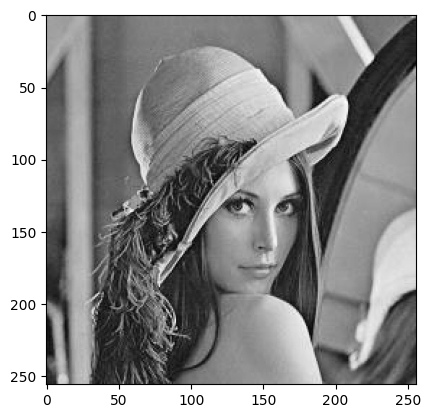

In [7]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/abcdef.bmp')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1, cmap='gray')

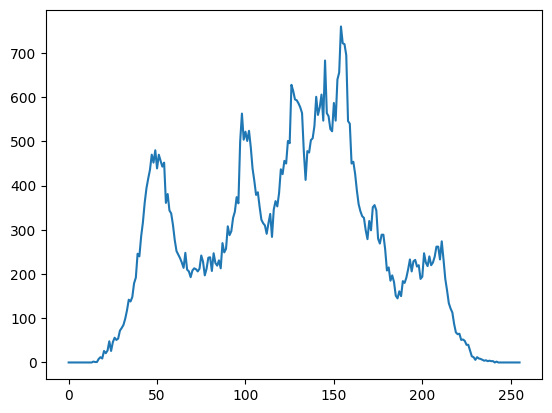

In [9]:
hist=cv2.calcHist([gimg1], [0], None, [256], [0, 256])
plt.plot(hist)

(256, 256)


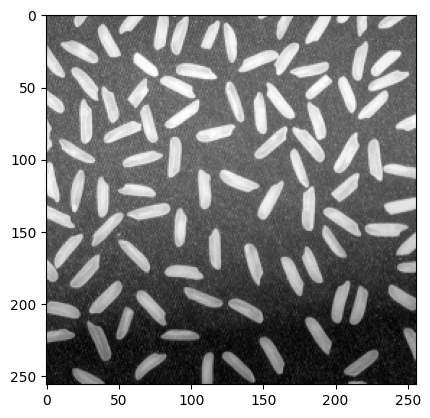

In [17]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/abcdef.bmp')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/rice.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1, cmap='gray')

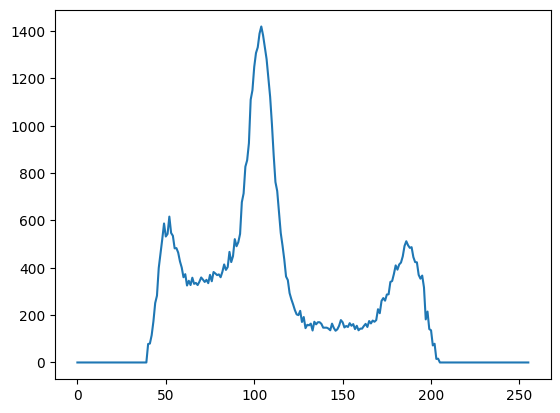

In [18]:
hist=cv2.calcHist([gimg1], [0], None, [256], [0, 256])
plt.plot(hist)

In [19]:
gBin=np.zeros((gimg1.shape[0], gimg1.shape[1]))

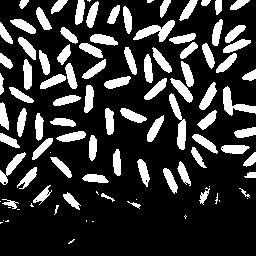

In [20]:
T = 150

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if(gimg1[h,w] > T):
      gBin[h,w] = 255
    else:
      gBin[h,w]=0
#plt.imshow(gBin, cmap = 'gray')
cv2_imshow(gBin)

(360, 360)


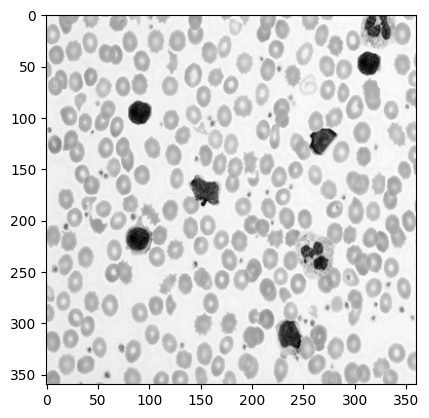

In [21]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/abcdef.bmp')
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/rice.bmp')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/cell.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1, cmap='gray')

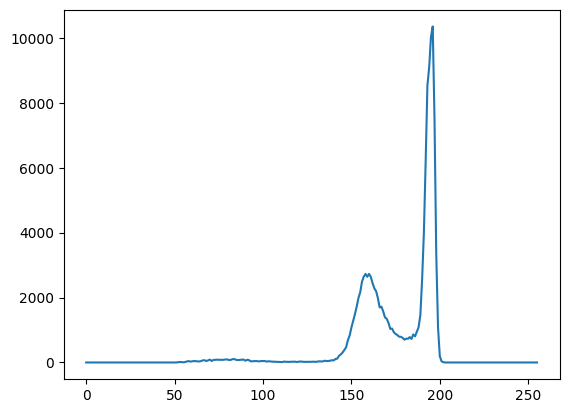

In [22]:
hist=cv2.calcHist([gimg1], [0], None, [256], [0, 256])
plt.plot(hist)

In [24]:
gBin=np.zeros((gimg1.shape[0], gimg1.shape[1]))

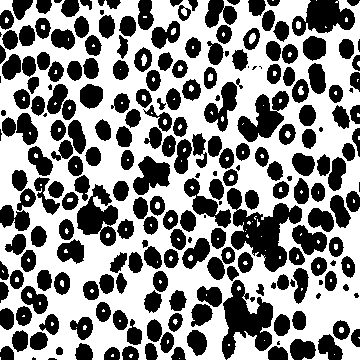

In [25]:
T = 180

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if(gimg1[h,w] > T):
      gBin[h,w] = 255
    else:
      gBin[h,w]=0
#plt.imshow(gBin, cmap = 'gray')
cv2_imshow(gBin)

(256, 256)


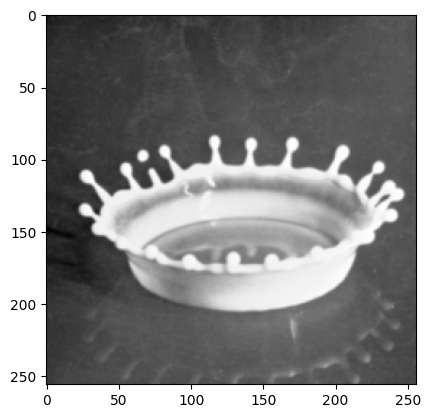

In [39]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/abcdef.bmp')
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/cell-bright.bmp')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1, cmap='gray')

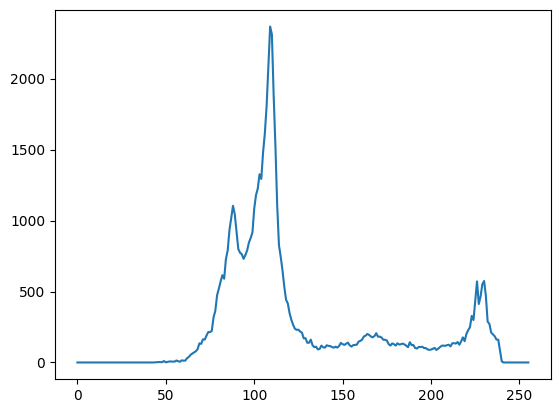

In [40]:
hist=cv2.calcHist([gimg1], [0], None, [256], [0, 256])
plt.plot(hist)

In [41]:
gBin=np.zeros((gimg1.shape[0], gimg1.shape[1]))

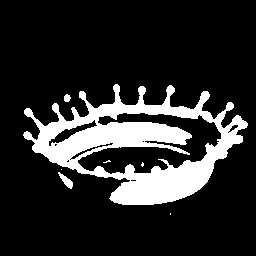

In [42]:
T = 180

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if(gimg1[h,w] > T):
      gBin[h,w] = 255
    else:
      gBin[h,w]=0
#plt.imshow(gBin, cmap = 'gray')
cv2_imshow(gBin)

In [43]:
T1 = 50
T2 = 0
T0 = 1
outimg = np.zeros((gimg1.shape[0], gimg1.shape[1]))

In [49]:
def threshold_update(h, w, img, output, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
     if(output[h,w] == 255):
      sum1 = sum1 + img[h,w]
      count1 = count1 + 1
    else:
      sum2 = sum2 + img[h,w]
      count2 = count2 + 1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T2= np.int32(avg1 + avg2)/2
  return T2

In [50]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if(gimg1[h,w]>T1):
      outimg[h,w]=255
    else:
      outimg[h,w]=0

In [51]:
while True:
  T2 = threshold_update(gimg1.shape[0], gimg1.shape[1], gimg1, outimg, T1)


  if(np.abs(T2-T1)<T0):
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if(gimg1[h,w]>T2):
          outimg[h,w]=255
        else:
          outimg[h,w]=0
    break;
  else:
    T1 = T2
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
       if(gimg1[h,w]>T2):
        outimg[h,w]=255
      else:
        outimg[h,w]=0

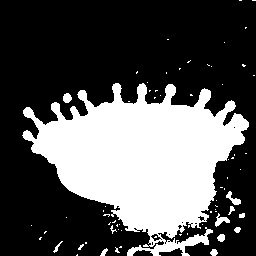

116.0


In [52]:
cv2_imshow(outimg)
print(T2)